In [9]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


In [10]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
X=df.drop(columns = ['Time','Amount','Class']).values
y=df['Class'].values
y.sum()

492

In [12]:
from sklearn.linear_model import LogisticRegression
mod= LogisticRegression()
mod.fit(X,y).predict(X).sum()

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


348

In [13]:
mod1= LogisticRegression(class_weight = {0:1 , 1:2})
mod1.fit(X,y).predict(X).sum()

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


433

In [14]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV (
    estimator = LogisticRegression(),
    param_grid ={'class_weight' : [{0:1 , 1:x} for x in range(1,5)]},
    cv=5,
    n_jobs = -1
)
grid.fit(X,y)

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}, {0: 1, 1: 4}]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [15]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,15.386791,0.820634,0.026512,0.009295,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.999017,0.999350,0.998947,0.999298,0.999070,0.999136,0.000159,4
1,14.893398,1.696050,0.021885,0.007655,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.999052,0.999421,0.998999,0.999298,0.999175,0.999189,0.000155,3
2,13.037253,1.001468,0.025009,0.012504,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999052,0.999491,0.998964,0.999421,0.999210,0.999228,0.000204,2
3,10.868226,2.021756,0.018798,0.006232,"{0: 1, 1: 4}","{'class_weight': {0: 1, 1: 4}}",0.998999,0.999544,0.998982,0.999438,0.999280,0.999249,0.000227,1


In [16]:
from sklearn.metrics import precision_score, recall_score
recall_score(y,grid.predict(X))


0.7865853658536586

In [17]:
precision_score(y, grid.predict(X))

0.8113207547169812

In [20]:
from sklearn.metrics import make_scorer

grid1 = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid ={'class_weight' : [{0:1 , 1:x} for x in np.linspace(1,15,30)]},
    scoring = {'precision_score' : make_scorer(precision_score),'recall': make_scorer(recall_score)},
    refit = 'precision_score',
    return_train_score = True,
    cv=10,
    n_jobs = -1
)
grid1.fit(X,y)
pd.DataFrame(grid1.cv_results_)

C:\Users\akhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision_score,split1_test_precision_score,split2_test_precision_score,split3_test_precision_score,...,split2_train_recall,split3_train_recall,split4_train_recall,split5_train_recall,split6_train_recall,split7_train_recall,split8_train_recall,split9_train_recall,mean_train_recall,std_train_recall
0,16.769270,1.135328,0.050038,0.019570,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.578947,1.000000,0.976744,1.000000,...,0.589165,0.627540,0.627540,0.629797,0.602709,0.625282,0.611738,0.623025,0.635082,0.046499
1,15.293104,1.368204,0.058615,0.017664,"{0: 1, 1: 1.4827586206896552}","{'class_weight': {0: 1, 1: 1.4827586206896552}}",0.578947,1.000000,0.977273,1.000000,...,0.668172,0.686230,0.697517,0.695260,0.661400,0.670429,0.674944,0.690745,0.691981,0.031911
2,14.780375,1.253347,0.054963,0.016198,"{0: 1, 1: 1.9655172413793105}","{'class_weight': {0: 1, 1: 1.9655172413793105}}",0.584416,0.956522,0.955556,1.000000,...,0.702032,0.720090,0.726862,0.735892,0.711061,0.713318,0.717833,0.726862,0.726752,0.022170
3,14.637844,1.270615,0.048673,0.010252,"{0: 1, 1: 2.4482758620689653}","{'class_weight': {0: 1, 1: 2.4482758620689653}}",0.575000,0.956522,0.956522,1.000000,...,0.735892,0.749436,0.760722,0.769752,0.733634,0.753950,0.751693,0.767494,0.755877,0.017906
4,14.939076,0.728603,0.049111,0.016698,"{0: 1, 1: 2.931034482758621}","{'class_weight': {0: 1, 1: 2.931034482758621}}",0.575000,0.956522,0.956522,1.000000,...,0.747178,0.772009,0.774266,0.776524,0.744921,0.762980,0.760722,0.774266,0.767169,0.014849
5,16.842989,3.182047,0.050921,0.010859,"{0: 1, 1: 3.413793103448276}","{'class_weight': {0: 1, 1: 3.413793103448276}}",0.567901,0.923077,0.956522,1.000000,...,0.753950,0.781038,0.778781,0.783296,0.758465,0.774266,0.769752,0.778781,0.774847,0.012580
6,15.153697,1.306834,0.054230,0.010213,"{0: 1, 1: 3.896551724137931}","{'class_weight': {0: 1, 1: 3.896551724137931}}",0.567901,0.925926,0.956522,1.000000,...,0.769752,0.787810,0.785553,0.792325,0.767494,0.778781,0.778781,0.790068,0.783201,0.010231
7,14.613297,0.651261,0.051579,0.010008,"{0: 1, 1: 4.379310344827586}","{'class_weight': {0: 1, 1: 4.379310344827586}}",0.567901,0.928571,0.957447,1.000000,...,0.774266,0.792325,0.794582,0.801354,0.769752,0.787810,0.787810,0.805869,0.789748,0.011561
8,15.184409,1.531971,0.050658,0.009939,"{0: 1, 1: 4.862068965517242}","{'class_weight': {0: 1, 1: 4.862068965517242}}",0.567901,0.931034,0.957447,1.000000,...,0.781038,0.799097,0.803612,0.805869,0.781038,0.794582,0.794582,0.812641,0.796070,0.010317
9,15.943429,2.287192,0.049431,0.009781,"{0: 1, 1: 5.344827586206897}","{'class_weight': {0: 1, 1: 5.344827586206897}}",0.554217,0.931034,0.957447,0.970588,...,0.785553,0.805869,0.805869,0.808126,0.790068,0.803612,0.796840,0.817156,0.800812,0.009863


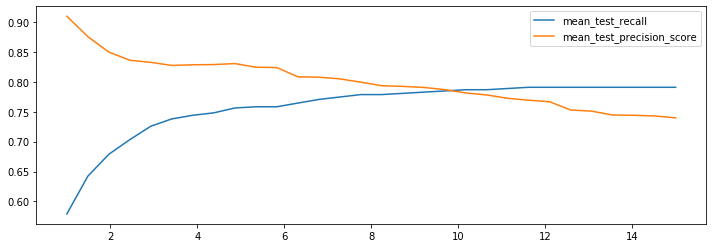

In [22]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid1.cv_results_)
for score in ['mean_test_recall','mean_test_precision_score']:
    plt.plot([_[1] for _ in df['param_class_weight']],
            df[score],
            label = score)
plt.legend();

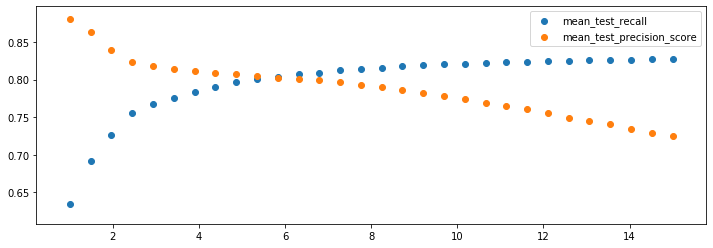

In [24]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid1.cv_results_)
for score in ['mean_test_recall','mean_test_precision_score']:
    plt.scatter(x=[_[1] for _ in df['param_class_weight']],
            y=df[score.replace('test', 'train')],
            label = score)
plt.legend();